In [ ]:
### Reading multiple csv files with Spark


In [ ]:
# # Import our SparkSession so we can use it
# from pyspark.sql import SparkSession
# # Create our SparkSession, this can take a couple minutes locally
# spark = SparkSession.builder.appName("basics").getOrCreate()

In [ ]:
# # Load in data
# from pyspark import SparkFiles #same
# from pyspark.sql.functions import lag, col
# import pyspark.sql.functions as F
# url = "Resources/Turnstile_data/Turnstile_Usage_Data__2016.csv"
# df = spark.read.csv(url, header=True, mode="DROPMALFORMED")

# df.show() 

In [ ]:
# # Print our schema
# df.printSchema()

In [ ]:
# df.count()

In [ ]:
# #cleaned_df = df.groupby(["Station", "SCP"]).count().show()
# cleaned_df = ((df.withColumn('Turnstile', F.struct(df.SCP))
#    .groupBy('Station')
#    .pivot('SCP').agg(F.count('SCP')).show()))

In [ ]:
# import pandas as pd
# import numpy as np
# import pyspark.sql.functions as func
# import datetime as dt
# import re
# import time

# import matplotlib.pyplot as plt

# import seaborn as sns


In [ ]:
# grouped_turnstile = df.groupBy("Station").agg({'Entries': 'mean'}).collect()
# grouped_turnstile

In [ ]:
# df1 = spark.createDataFrame(grouped_turnstile)
# df1.show()

In [ ]:
# from pyspark.sql.types import DoubleType
# df1 = df1.withColumn("avg(Entries)", df1["avg(Entries)"].cast(DoubleType()))
# df1.show()


In [ ]:
# df2 = df1.withColumn("Avg_Entries", func.round(df1["avg(Entries)"], 2))
# df2.show()

In [ ]:
# from pyspark.sql.functions import avg
# display(type_df.groupBy("Station").avg("Entries"))

In [ ]:
# from pyspark.sql.functions import desc

# df2.sort(desc("Avg_Entries")).show()

In [ ]:
# pandas_df = df2.toPandas()
# pandas_df.head()

In [ ]:
# pandas_df_1 = pandas_df.iloc[0:10] # first 10 rows of dataframe
# pandas_df_1.head()

In [ ]:
# import matplotlib.gridspec as gridspec
# # Pie chart, where the slices will be ordered and plotted counter-clockwise:

# df_1 = pandas_df_1["Station"]
# df_2 = pandas_df_1["Avg_Entries"]

# #Create a pie chart for top 10 categories
# plt.figure(1, figsize=(35,25))
# the_grid = gridspec.GridSpec(2, 2)
# explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
# cmap = plt.get_cmap("Spectral")
# colors = [cmap(i) for i in np.linspace(0, 1, 10)]
# plt.subplot(the_grid[0, 0], aspect=1)
# plt.title("Top 10 Subway Stations with highest Entries", fontsize=20)
# pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

# #Create a legend
# plt.legend(df_1,
#          title= "Stations",
#          loc= "center left",
#          bbox_to_anchor=(1.2, 0.2, 0, 1))
# plt.show()

In [ ]:
# grouped_turnstile_Ex= df.groupBy("Station").agg({'Exits                                                     ': 'mean'}).collect()
# grouped_turnstile_Ex

In [ ]:
# df3 = spark.createDataFrame(grouped_turnstile_Ex)
# df3.show()

In [ ]:
# from pyspark.sql.types import DoubleType
# df4 = df3.withColumn("avg(Exits                                                     )", df3["avg(Exits                                                     )"].cast(DoubleType()))
# df4.show()


In [ ]:
# df5 = df4.withColumn("Avg_Exits", func.round(df4["avg(Exits                                                     )"], 2))
# df5.show()

In [ ]:
# from pyspark.sql.functions import desc

# df5.sort(desc("Avg_Exits")).show()

In [ ]:
# pandas_df_2 = df5.toPandas()
# pandas_df_2 = pandas_df_2.sort_values('Avg_Exits', ascending=False)


In [ ]:
# pandas_df_exits = pandas_df_2.iloc[0:10] # first 10 rows of dataframe
# pandas_df_exits

In [ ]:
# df_1_exits = pandas_df_exits["Station"]
# df_2_exits = pandas_df_exits['Avg_Exits']

# #Create a pie chart for top 10 categories
# plt.figure(1, figsize=(35,25))
# the_grid = gridspec.GridSpec(2, 2)
# explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
# cmap = plt.get_cmap("Spectral")
# colors = [cmap(i) for i in np.linspace(0, 1, 10)]
# plt.subplot(the_grid[0, 0], aspect=1)
# plt.title("Top 10 Subway Stations with highest Exits", fontsize=20)
# pie = plt.pie(df_2_exits,labels = df_1_exits, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

# #Create a legend
# plt.legend(df_1_exits,
#          title= "Stations",
#          loc= "center left",
#          bbox_to_anchor=(1.2, 0.2, 0, 1))
# plt.show()

# Using Pandas - NYC Subway Turnstile 2016




In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import datetime as dt
import re
import time
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading CSV file
df = pd.read_csv("Resources/Turnstile_data/Turnstile_Usage_Data__2016.csv", low_memory=False)
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972


In [5]:
list(df)

['C/A',
 'Unit',
 'SCP',
 'Station',
 'Line Name',
 'Division',
 'Date',
 'Time',
 'Description',
 'Entries',
 'Exits                                                     ']

In [ ]:
#df['Stations_shifted'] = df["Station"].shift(-1)

In [ ]:
# Groupby "Station", "SCP", "Date", "Time"
# df_grouped = df.groupby(["Station", "Date"]).sum()
# df_grouped
# # df_by_date = df_turnstile_data.groupby([ "Station", "Date"]).agg ({'Total_Traffic_Passengers':'sum'})
# df_by_date.head()

In [7]:
df.rename(columns = {'Exits                                                     ': 'Exits'}, inplace=True)

In [8]:
# Shifting Entries and Exits Columns
df['Entries_shifted'] = df["Entries"].shift(-1)
df["Exits_shifted"] = df["Exits"].shift(-1)

#Replacing NaN with zeroes
#df = df.fillna(0)

df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0


In [9]:
# if (df["Station"]==df["Stations_shifted"]):
#     df_grouped["Diff_Entries"] = df_grouped["Entries_shifted"] - df_grouped["Entries"] 
#     df_grouped["Diff_Exits"] = df_grouped["Exits_shifted"] - df_grouped["Exits"] 

# else:
#     df_grouped["Diff_Entries"] = df_grouped["Entries_shifted"] - 0 
#     df_grouped["Diff_Exits"] = df_grouped["Exits_shifted"] - 0

    

In [10]:
#Difference between Columns Entries and Entries_Shifted to have the net result of each turnstile per date and time
df["Diff_Entries"] = df["Entries"] - df["Entries_shifted"] 
df["Diff_Exits"] = df["Exits"] - df["Exits_shifted"] 
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0


In [11]:
# total = df['Diff_Entries'].sum()
# print(total)


5985901.0


In [12]:
# total = df['Diff_Exits'].sum()
# print(total)


2028138.0


In [19]:
#Entries = Checking if the turnstile rolled over to the zero position (Turnstile have a 10-digit counter)
df['Diff_Entries_Adjusted'] = np.where(df['Diff_Entries'] >=0, df['Diff_Entries'], 10000000000 + df['Diff_Entries'])
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits,Diff_Entries_Adjusted,Diff_Exits_Adjusted,Total_Traffic_Passengers
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0,452.0,33.0,485.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0,1072.0,58.0,1130.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0,778.0,263.0,1041.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0,27.0,42.0,69.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0,88.0,7.0,95.0


In [32]:
#Exit = Checking if the turnstile rolled over to the zero position (Turnstile have a 10-digit counter)
df['Diff_Exits_Adjusted'] = np.where(df['Diff_Exits'] >=0, df['Diff_Exits'], 10000000000 + df['Diff_Exits'])
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits,Diff_Entries_Adjusted,Diff_Exits_Adjusted,Total_Traffic_Passengers
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0,452.0,33.0,485.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0,1072.0,58.0,1130.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0,778.0,263.0,1041.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0,27.0,42.0,69.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0,88.0,7.0,95.0


In [33]:
# total = df['Diff_Entries_Adjusted'].sum()
# print(total)


In [35]:
df["Total_Traffic_Passengers"]= df['Diff_Entries_Adjusted'] + df['Diff_Exits_Adjusted']  
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits,Diff_Entries_Adjusted,Diff_Exits_Adjusted,Total_Traffic_Passengers
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0,452.0,33.0,485.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0,1072.0,58.0,1130.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0,778.0,263.0,1041.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0,27.0,42.0,69.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/30/2016,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0,88.0,7.0,95.0


In [60]:
# Total = df['Total_Traffic_Passengers'].sum()
# print(Total)


In [26]:
#df.to_pickle('total_passengers_2016.pkl')

In [27]:
#df.to_csv('total_passengers_2016.csv')

In [37]:
# Entries - Groupby"Station","Date", "Time"/ Sum of the entries ajusted 
df1 = df.groupby(["Station", "Date", "Time"], sort=False)["Diff_Entries_Adjusted"].sum().reset_index(name ='Total_Entries')
df1.head()

,Station,Date,Time,Total_Entries
0,59 ST,12/30/2016,23:00:00,1.000001e+10
1,59 ST,12/30/2016,19:00:00,1.000003e+10
2,59 ST,12/30/2016,15:00:00,1.000002e+10
3,59 ST,12/30/2016,07:00:00,1.000000e+10
4,59 ST,12/30/2016,03:00:00,1.000000e+10


In [38]:
#Entries = Grouping per station the total number of passengers
df2_a= df1.groupby(["Station"], sort= False)["Total_Entries"].sum().reset_index(name ='Total_Entries_Station')
df2_a.head()

,Station,Total_Entries_Station
0,59 ST,4.499989e+12
1,5 AV/59 ST,8.000068e+10
2,57 ST-7 AV,5.205000e+13
3,49 ST,1.199993e+11
4,TIMES SQ-42 ST,2.077998e+13


In [39]:
#Sorting in descending order the Total of Entries per Station
df2_aa = df2_a.sort_values(by='Total_Entries_Station', ascending=False)
df2_aa.head()

,Station,Total_Entries_Station
135,42 ST-PORT AUTH,6.140001e+13
127,125 ST,5.315216e+13
2,57 ST-7 AV,5.205000e+13
7,23 ST,4.034222e+13
105,104 ST,3.743995e+13


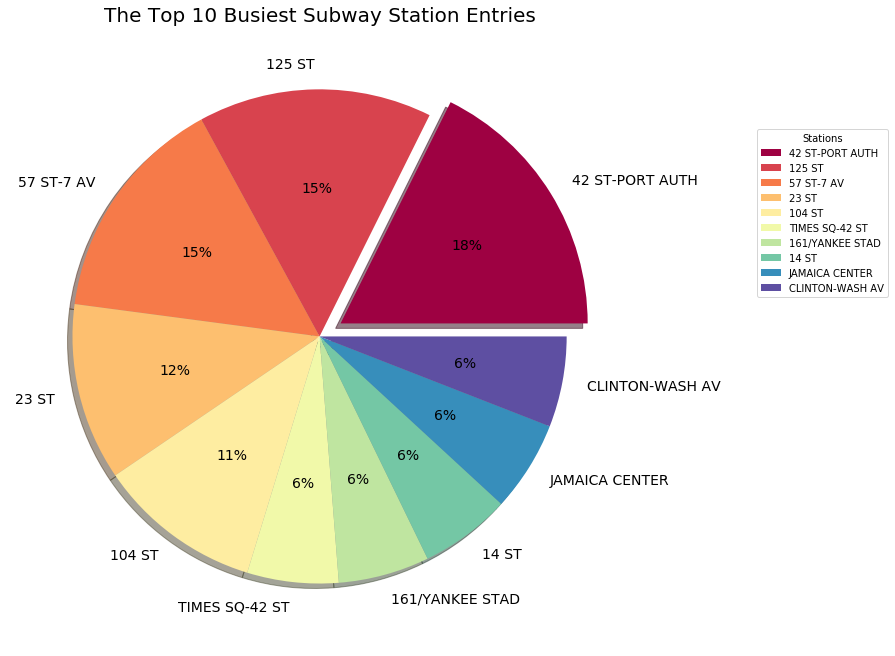

In [40]:
#Plotting the 10 Busiest Stations 
df_1 = df2_aa["Station"].iloc[0:10]
df_2 = df2_aa["Total_Entries_Station"].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("The Top 10 Busiest Subway Station Entries", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

In [41]:
#Exits - Total number of exits grouped by "Station", "Date", "Time"
df1_b = df.groupby(["Station", "Date", "Time"], sort=False)["Diff_Exits_Adjusted"].sum().reset_index(name ='Total_Exits')
df1_b.head()

,Station,Date,Time,Total_Exits
0,59 ST,12/30/2016,23:00:00,1.000001e+10
1,59 ST,12/30/2016,19:00:00,1.000001e+10
2,59 ST,12/30/2016,15:00:00,1.000001e+10
3,59 ST,12/30/2016,07:00:00,1.000000e+10
4,59 ST,12/30/2016,03:00:00,1.000000e+10


In [42]:
#Exits- Total number of passengers grouped by station
df2_b= df1_b.groupby(["Station"], sort = False)["Total_Exits"].sum().reset_index(name ='Total_Exits_Station')
df2_b.head()

,Station,Total_Exits_Station
0,59 ST,2.117000e+13
1,5 AV/59 ST,8.000373e+10
2,57 ST-7 AV,7.339997e+13
3,49 ST,1.400263e+11
4,TIMES SQ-42 ST,3.499980e+11


In [43]:
#Exits- Sorting the total number os passengers in descending order
df2_bb = df2_b.sort_values(by='Total_Exits_Station', ascending=False)
df2_bb.head()

,Station,Total_Exits_Station
2,57 ST-7 AV,7.339997e+13
105,104 ST,4.933999e+13
0,59 ST,2.117000e+13
135,42 ST-PORT AUTH,2.093001e+13
7,23 ST,2.089198e+13


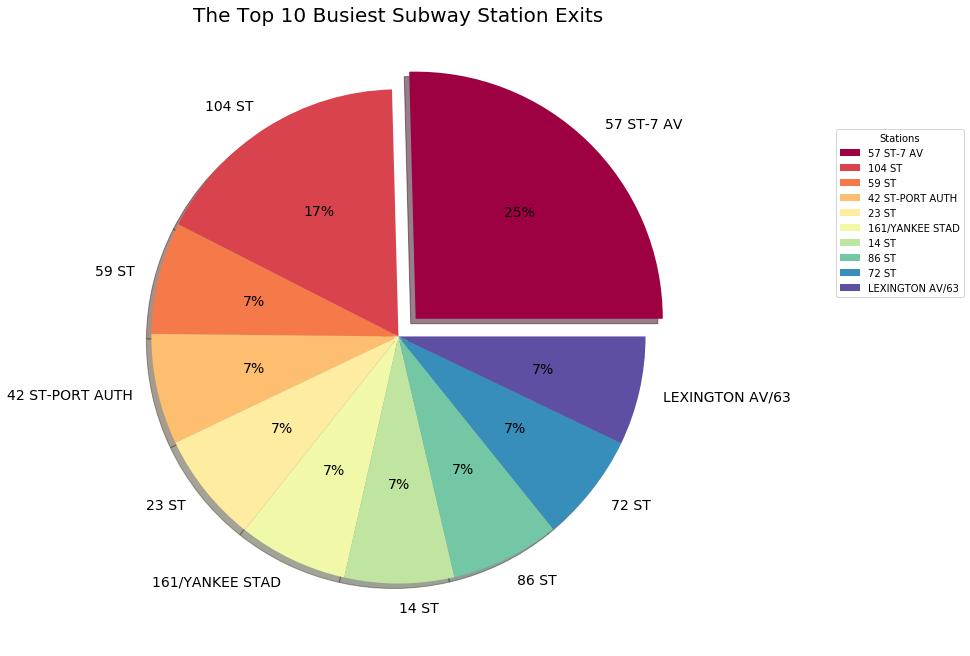

In [44]:
#Plotting the 10 busiest exits 
df_1 = df2_bb["Station"].iloc[0:10]
df_2 = df2_bb["Total_Exits_Station"].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("The Top 10 Busiest Subway Station Exits", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

#  The TOP 10 Busiest Subway Stations in NYC


In [45]:
df_total =  df.groupby(["Station"], sort = False)["Total_Traffic_Passengers"].sum().reset_index(name ='Total_Traffic_Passenger_Station')
df_total.head()

,Station,Total_Traffic_Passenger_Station
0,59 ST,2.566999e+13
1,5 AV/59 ST,1.600044e+11
2,57 ST-7 AV,1.254500e+14
3,49 ST,2.600256e+11
4,TIMES SQ-42 ST,2.112998e+13


In [46]:
df_total = df_total.sort_values(by='Total_Traffic_Passenger_Station', ascending=False)
df_total.head()

,Station,Total_Traffic_Passenger_Station
2,57 ST-7 AV,1.254500e+14
105,104 ST,8.677994e+13
135,42 ST-PORT AUTH,8.233002e+13
7,23 ST,6.123420e+13
127,125 ST,5.342309e+13


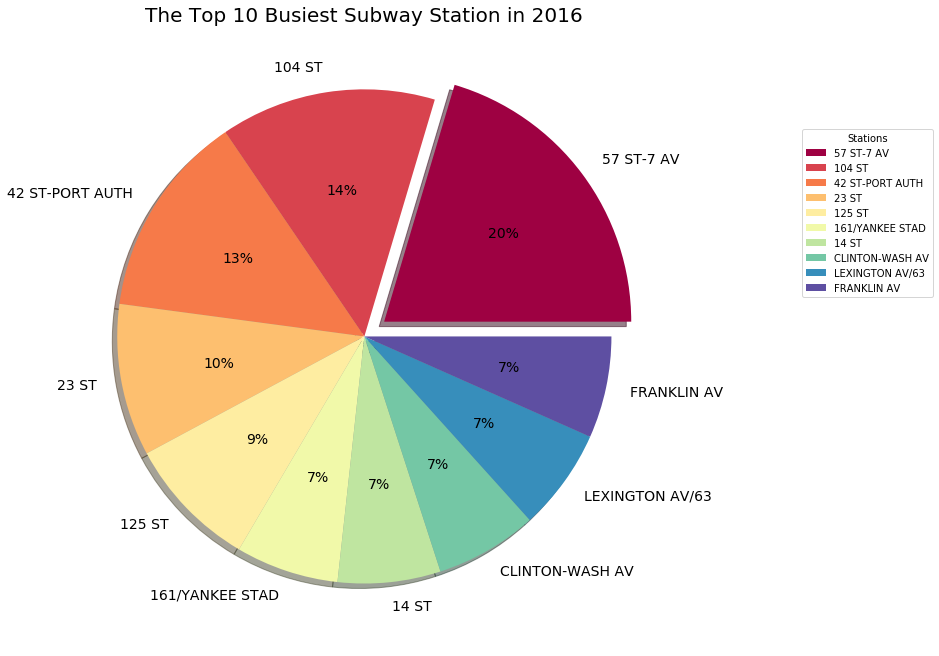

In [52]:
#Plotting the 10 busiest exits 
df_1 = df_total["Station"].iloc[0:10]
df_2 = df_total["Total_Traffic_Passenger_Station"].iloc[0:10]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("The Top 10 Busiest Subway Station in 2016", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

In [53]:
# df_bar = pd.read_csv("total_passengers_2016.csv", low_memory=False)
# df_bar.head()

In [56]:
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
df['day_of_week'] = df['Date'].dt.day_name()
df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entries_shifted,Exits_shifted,Diff_Entries,Diff_Exits,Diff_Entries_Adjusted,Diff_Exits_Adjusted,Total_Traffic_Passengers,day_of_week
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-30,23:00:00,REGULAR,5991455,2028368,5991003.0,2028335.0,452.0,33.0,452.0,33.0,485.0,Friday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-30,19:00:00,REGULAR,5991003,2028335,5989931.0,2028277.0,1072.0,58.0,1072.0,58.0,1130.0,Friday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-30,15:00:00,REGULAR,5989931,2028277,5989153.0,2028014.0,778.0,263.0,778.0,263.0,1041.0,Friday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-30,07:00:00,REGULAR,5989153,2028014,5989126.0,2027972.0,27.0,42.0,27.0,42.0,69.0,Friday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2016-12-30,03:00:00,REGULAR,5989126,2027972,5989038.0,2027965.0,88.0,7.0,88.0,7.0,95.0,Friday


In [59]:
df.nunique()

C/A                             731
Unit                            467
SCP                             219
Station                         376
Line Name                       128
Division                          6
Date                            336
Time                          85074
Description                       2
Entries                     5500739
Exits                       4869597
Entries_shifted             5500738
Exits_shifted               4869597
Diff_Entries                  19147
Diff_Exits                    17689
Diff_Entries_Adjusted         19147
Diff_Exits_Adjusted           17689
Total_Traffic_Passengers      25222
day_of_week                       7
dtype: int64

In [63]:
df_Station42 = (df[(df["Station"]=="42 ST-PORT AUTH")]
                     .groupby("day_of_week", sort=False, as_index=False)
                     [['Total_Traffic_Passengers']]
                     .agg(sum))
df_Station42['Total_Traffic_Passengers'] = np.log(df_Station42.Total_Traffic_Passengers)
df_Station42.head()

,day_of_week,Total_Traffic_Passengers
0,Friday,30.082027
1,Thursday,30.104170
2,Wednesday,30.100839
3,Tuesday,30.110916
4,Monday,30.088867


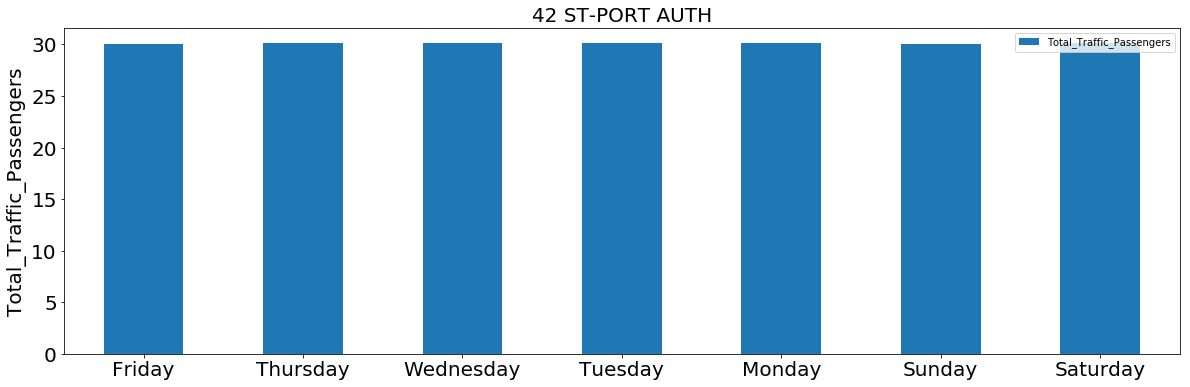

In [64]:
ax = df_Station42.plot(x='day_of_week', kind='bar', figsize=(20, 6), rot=0, fontsize=20);
#ax.set(xlabel=‘Day of Week’, ylabel=‘Count’);
ax.set_title('42 ST-PORT AUTH', fontsize = 20)
ax.set_xlabel('', fontsize = 20);
ax.set_ylabel('Total_Traffic_Passengers', fontsize = 20);

In [102]:
# station_daily_count_df = df_bar.groupby(['Station', "Date"], sort=False, as_index=False)\
#                                    [['Diff_Entries_Adjusted', 'Diff_Exits_Adjusted'
#                                     ]].agg(sum)

# station_daily_count_df.head(50)
                                           

In [103]:
# ax = st_wkdymean_top_df[[‘MEAN_WKDY’,‘MEAN_WKEN’]].plot(kind=‘bar’, figsize=(20, 6));
# fig = ax.get_figure()
# ax.set_xticklabels([name[:name.index(‘_’)] for name in st_wkdymean_top_df.index]);
# plt.xlabel(‘’);
# plt.ylabel(‘Count’);
# plt.xticks(rotation=25)
# plt.title(‘Weekday vs Weekend usage for top 10 stations’);